In [1]:
# things we need for NLP

import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

# things we need for Tensorflow
import numpy as np
import tensorflow as tf
import random
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install tensorflow


In [2]:
# import training dataset
import json
with open("C:/Users/RSHAF/Desktop/chatbot2/data.json") as f:
    intents = json.load(f)

In [3]:
type(intents["intents"])

list

In [4]:
nltk.download('punkt')
vocab = []  # for vocabulary
classes = [] #tags
documents = [] # contain questions/ user inputs and the tags
ignore_words = ['?']  #remove punctuations
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        vocab.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# stem and lower each word and remove duplicates
vocab = [stemmer.stem(w.lower()) for w in vocab if w not in ignore_words]  #converting the words to lower and then stemming the words
vocab = sorted(list(set(vocab)))  #converting it to set so that it removes the duplicate words, and then again converting it to list


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RSHAF\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:

classes = sorted(list(set(classes)))

print (len(documents), "documents")
print(documents)
print (len(classes), "classes", classes)
print (len(vocab), "unique stemmed words", vocab)

232 documents
[(['Hi'], 'greeting'), (['Hey'], 'greeting'), (['Is', 'anyone', 'there', '?'], 'greeting'), (['Hi', 'there'], 'greeting'), (['Hello'], 'greeting'), (['Hey', 'there'], 'greeting'), (['Howdy'], 'greeting'), (['Hola'], 'greeting'), (['Bonjour'], 'greeting'), (['Konnichiwa'], 'greeting'), (['Guten', 'tag'], 'greeting'), (['Ola'], 'greeting'), (['Good', 'morning'], 'morning'), (['Good', 'afternoon'], 'afternoon'), (['Good', 'evening'], 'evening'), (['Good', 'night'], 'night'), (['Bye'], 'goodbye'), (['See', 'you', 'later'], 'goodbye'), (['Goodbye'], 'goodbye'), (['Au', 'revoir'], 'goodbye'), (['Sayonara'], 'goodbye'), (['ok', 'bye'], 'goodbye'), (['Bye', 'then'], 'goodbye'), (['Fare', 'thee', 'well'], 'goodbye'), (['Thanks'], 'thanks'), (['Thank', 'you'], 'thanks'), (['That', "'s", 'helpful'], 'thanks'), (['Thanks', 'for', 'the', 'help'], 'thanks'), (['Than', 'you', 'very', 'much'], 'thanks'), ([], 'no-response'), (['nothing', 'much'], 'neutral-response'), (['Who', 'are', 'you

In [6]:

# create our training data
training = []
# create an empty array for our output
output = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in vocab:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)

# create train and test lists
train_x = list(training[:,0])
train_y = list(training[:,1])
     

In [7]:
print("training data input:",train_x[0])
print("training data output",train_y[0])

training data input: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
training data output [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
testing = []

vocab2 = []  # for vocabulary
classes2 = [] #tags
documents2 = [] # contain questions/ user inputs and the tags
ignore_words2 = ['?','!']  #remove punctuations
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        vocab2.extend(w)
        # add to documents in our corpus
        documents2.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes2:
            classes2.append(intent['tag'])

# stem and lower each word and remove duplicates
vocab2 = [stemmer.stem(w.lower()) for w in vocab2 if w not in ignore_words2]  #converting the words to lower and then stemming the words
vocab2 = sorted(list(set(vocab2))) 

In [9]:
classes2 = sorted(list(set(classes2)))

print (len(documents2), "documents2")
print(documents2)
print (len(classes2), "classes", classes2)
print (len(vocab2), "unique stemmed words2", vocab2)

232 documents2
[(['Hi'], 'greeting'), (['Hey'], 'greeting'), (['Is', 'anyone', 'there', '?'], 'greeting'), (['Hi', 'there'], 'greeting'), (['Hello'], 'greeting'), (['Hey', 'there'], 'greeting'), (['Howdy'], 'greeting'), (['Hola'], 'greeting'), (['Bonjour'], 'greeting'), (['Konnichiwa'], 'greeting'), (['Guten', 'tag'], 'greeting'), (['Ola'], 'greeting'), (['Good', 'morning'], 'morning'), (['Good', 'afternoon'], 'afternoon'), (['Good', 'evening'], 'evening'), (['Good', 'night'], 'night'), (['Bye'], 'goodbye'), (['See', 'you', 'later'], 'goodbye'), (['Goodbye'], 'goodbye'), (['Au', 'revoir'], 'goodbye'), (['Sayonara'], 'goodbye'), (['ok', 'bye'], 'goodbye'), (['Bye', 'then'], 'goodbye'), (['Fare', 'thee', 'well'], 'goodbye'), (['Thanks'], 'thanks'), (['Thank', 'you'], 'thanks'), (['That', "'s", 'helpful'], 'thanks'), (['Thanks', 'for', 'the', 'help'], 'thanks'), (['Than', 'you', 'very', 'much'], 'thanks'), ([], 'no-response'), (['nothing', 'much'], 'neutral-response'), (['Who', 'are', 'yo

In [10]:
# create our training data
testing = []
#output = []
# create an empty array for our output
output2 = [0] * len(classes)
print(len(output2))
# training set, bag of words for each sentence
for doc in documents2:
    # initialize our bag of words
    bag2 = []
    # list of tokenized words for the pattern
    pattern_words2 = doc[0]
    # stem each word
    pattern_words2 = [stemmer.stem(word.lower()) for word in pattern_words2]
    # create our bag of words array
    for w in vocab:
        bag2.append(1) if w in pattern_words2 else bag2.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row2 = list(output2)
    output_row2[classes.index(doc[1])] = 1

    testing.append([bag2, output_row2])

# shuffle our features and turn into np.array
random.shuffle(testing)
testing = np.array(testing)

# create train and test lists
test_x = list(testing[:,0])
test_y = list(testing[:,1])

80


In [11]:
len(test_x[0])

279

In [12]:
len(train_x[0])

279

In [15]:

import livelossplot
plot_losses = livelossplot.PlotLossesKeras()


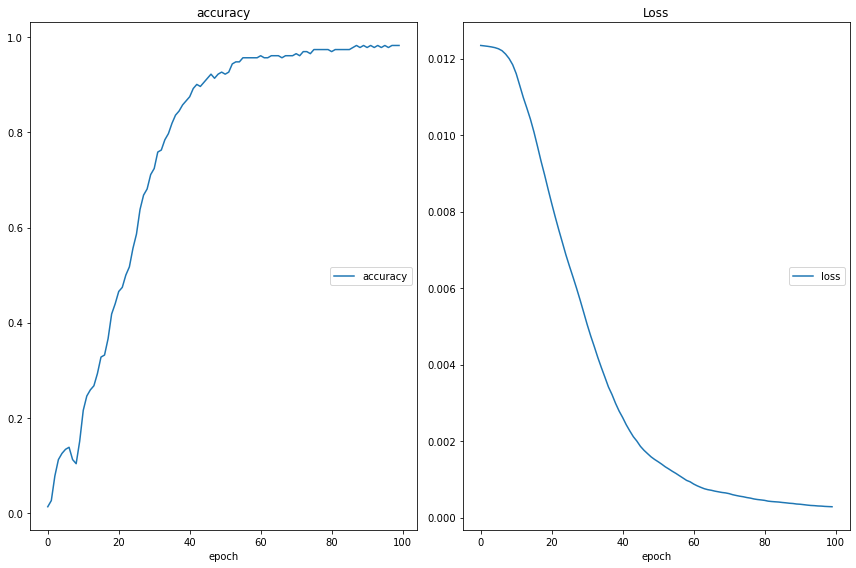

accuracy
	accuracy         	 (min:    0.013, max:    0.983, cur:    0.983)
Loss
	loss             	 (min:    0.000, max:    0.012, cur:    0.000)
29/29 [==============================] - 0s 7ms/step - loss: 2.8304e-04 - accuracy: 0.9828


In [16]:


#sequential neural network model

model = tf.keras.Sequential([tf.keras.layers.Dense(16, input_shape = (None,len(train_x[0]))), # input layer 
                             tf.keras.layers.Dense(10), #hidden layer

                             tf.keras.layers.Dense(len(train_y[0]),activation="softmax"),]) #output layer
model.compile(optimizer = "adam",loss = "mean_squared_error",metrics = ['accuracy'])
model.fit(train_x, train_y, epochs=100, batch_size=8,callbacks=[plot_losses])
model.save('model.keras')



In [19]:

# Evaluation of the model with test data

scores = model.evaluate(test_x,test_y)
print("test loss:",scores[0])
print("test accuracy:", scores[1])

8/8 [==============================] - 0s 715us/step - loss: 2.7761e-04 - accuracy: 0.9828
test loss: 0.0002776057517621666
test accuracy: 0.982758641242981


In [ ]:
pip install pydot


In [20]:

import pickle
pickle.dump( {'vocab':vocab, 'classes':classes, 'train_x':train_x, 'train_y':train_y}, open( "training_data", "wb" ) )

In [22]:
#restore all of our data structures
import pickle
data = pickle.load( open( "training_data", "rb" ) )
vocab = data['vocab']
classes = data['classes']
train_x = data['train_x']
train_y = data['train_y']

# import our chat-bot intents file
import json
with open("C:/Users/RSHAF/Desktop/chatbot2/data.json") as f:
    intents = json.load(f)

In [23]:
# convert user input to BOW
def clean_up_sentence(sentence):
    # tokenize the pattern
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=False):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    bag = np.array(bag)
    bag= bag.tolist()
    return(bag)
     

In [24]:
data['vocab']

["'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 ',',
 '.',
 'a',
 'about',
 'absolv',
 'adv',
 'affect',
 'afternoon',
 'again',
 'al',
 'alot',
 'already',
 'am',
 'and',
 'anoth',
 'answ',
 'anxy',
 'any',
 'anym',
 'anyon',
 'anyth',
 'appear',
 'approach',
 'ar',
 'ask',
 'au',
 'avail',
 'aw',
 'away',
 'be',
 'becaus',
 'becom',
 'bef',
 'bet',
 'between',
 'bonjo',
 'boyfriend',
 'break',
 'bring',
 'broth',
 'burn',
 'by',
 'bye',
 'ca',
 'cal',
 'can',
 'caus',
 'che',
 'child',
 'commit',
 'connect',
 'continu',
 'control',
 'could',
 'crazy',
 'cre',
 'cur',
 'dad',
 'day',
 'defin',
 'depress',
 'deserv',
 'did',
 'die',
 'died',
 'diff',
 'disord',
 'do',
 'doe',
 'down',
 'dumb',
 'els',
 'empty',
 'enough',
 'ev',
 'exam',
 'fact',
 'famy',
 'far',
 'feel',
 'few',
 'fin',
 'find',
 'foc',
 'for',
 'friend',
 'from',
 'get',
 'girlfriend',
 'giv',
 'go',
 'going',
 'good',
 'goodby',
 'gre',
 'group',
 'guess',
 'gut',
 'had',
 'hand',
 'happy',
 'hat',
 'hav',
 'heal',
 'hello',

In [29]:
x = bow("Hola",vocab)
print(x)
     

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [30]:
rate = 0.25
def classify(sentence):
    # generate probabilities from the model
    results = model.predict([bow(sentence, vocab)])[0]
    print(results)
    # filter out predictions below a threshold
    results = [[i,r] for i,r in enumerate(results) if r>rate]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1]))
    
    return return_list

def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    # if we have a classification then find the matching intent tag
    if results:
        # loop as long as there are matches to process
        while results:
            for i in intents['intents']:
                # find a tag matching the first result
                if i['tag'] == results[0][0]:
                    # a random response from the intent
                    return print(random.choice(i['responses']))

            results.pop(0)

In [32]:
classify("Hola")

1/1 [==============================] - 0s 20ms/step
[1.93657543e-04 1.16158685e-06 1.99327644e-07 3.22479968e-06
 9.27422754e-03 2.21297517e-03 2.16131889e-06 5.75225521e-03
 2.65190778e-07 1.69230613e-03 5.17757962e-06 6.43255930e-07
 8.79939250e-08 9.69830936e-08 9.50828962e-06 3.50438654e-07
 1.83689739e-08 1.25868473e-06 3.52851011e-08 1.82645499e-06
 5.98616836e-08 1.32158220e-06 2.53306280e-06 1.36775611e-06
 1.35308326e-07 2.05898331e-07 1.29699529e-07 3.41873118e-07
 6.56367263e-07 8.86259329e-07 2.58208559e-07 5.96235310e-08
 1.05667300e-06 3.47023814e-07 2.81004844e-07 1.50041287e-05
 2.46469899e-05 2.41136803e-07 1.49321204e-06 1.00975092e-06
 6.27041246e-08 5.26197709e-07 3.86787946e-07 2.13515414e-05
 9.73695278e-01 1.78050705e-05 1.19578246e-04 8.43026646e-06
 4.05532075e-03 2.92506214e-04 7.59605030e-07 8.26454084e-07
 1.19279252e-06 2.86382070e-04 1.48568006e-05 3.83634870e-07
 8.32688784e-06 4.17966330e-05 1.92865864e-05 2.10561102e-05
 9.95581970e-04 1.71900847e-05 4.

[('greeting', 0.9736953)]

In [34]:
classify("lonely")

1/1 [==============================] - 0s 20ms/step
[8.0055799e-03 3.6993868e-05 1.5562291e-06 3.0942874e-06 3.6169611e-02
 1.5329468e-03 2.5884568e-04 1.7294742e-02 4.6559529e-05 1.1134752e-02
 5.3621079e-05 4.4033754e-06 2.3068706e-06 2.3560111e-04 8.5224592e-06
 2.3399949e-05 2.8459219e-06 3.5806789e-04 3.3529416e-06 1.8216255e-05
 1.4503139e-05 2.8308987e-06 1.9921052e-04 6.3916508e-05 4.7871021e-05
 1.8493089e-06 5.6858818e-05 4.9056140e-05 6.2154190e-06 2.5369030e-05
 1.8675568e-06 1.8799905e-06 2.2712216e-05 9.7934108e-06 8.1794790e-04
 4.7061971e-05 5.5915629e-04 5.8174166e-05 8.7886374e-04 2.0375270e-04
 1.2050891e-05 1.2346958e-05 3.6728041e-05 5.5977148e-01 2.6017645e-02
 3.0446337e-03 2.7097150e-04 4.7614682e-03 2.3924331e-03 7.8924722e-06
 2.8340887e-06 1.6737167e-05 5.1461905e-04 1.0528332e-03 2.4463873e-06
 4.3604938e-05 3.6273934e-03 6.7937974e-04 1.2210632e-05 3.5482662e-05
 2.0318320e-03 1.7066692e-05 2.0779861e-04 1.4264325e-05 2.3919607e-02
 2.5052273e-01 4.1810708e

[('goodbye', 0.5597715), ('sad', 0.25052273)]

In [35]:

def start_chat():
  print(":start")
  while True:
    inp = input("me:")
    if inp.lower() == "quit":
      
      break

    result = model.predict([[bow(inp,vocab)]])
    
    result_ind = np.argmax(result)
    tag = classes[result_ind]
    
    for tg in intents["intents"]:
      if tg["tag"] == tag:
        responses = tg["responses"]

    print(random.choice(responses))
    


start_chat()

:start
me:hi
1/1 [==============================] - 0s 66ms/step
Hi there. How are you feeling today?
me:sad
1/1 [==============================] - 0s 19ms/step
How long have you been feeling this way?
me:hmm
1/1 [==============================] - 0s 20ms/step
I'm listening. Please go on.
me:i dont know
1/1 [==============================] - 0s 20ms/step
Forgive me if i did anything to offend you. I only want to help
me:thank you
1/1 [==============================] - 0s 20ms/step
Happy to help!
me:quit


In [36]:
for i in intents["intents"]:
  if i["tag"] == "greeting":
    responses = i["responses"]
print(responses)


['Hello there. Tell me how are you feeling today?', 'Hi there. What brings you here today?', 'Hi there. How are you feeling today?', 'Great to see you. How do you feel currently?', "Hello there. Glad to see you're back. What's going on in your world right now?"]
